In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv("Kaagle_Upload.csv")
dataframe

c:\users\aarnab saha\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285326,2.01598E+12,9,9,0,18,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285327,2.01598E+12,10,9,0,18,0,0,1,0,1,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,5.0
285328,2.01598E+12,11,9,0,18,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285329,2.01598E+12,12,9,0,18,0,0,1,0,0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,-1.0


In [3]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataframe.columns if dataframe[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature,np.round(dataframe[feature].isnull().mean(),4),'%missing values')

location_easting_osgr 0.0002 %missing values
location_northing_osgr 0.0002 %missing values
longitude 0.0002 %missing values
latitude 0.0002 %missing values
time 0.0001 %missing values
lsoa_of_accident_location 0.0599 %missing values
casualty_reference 0.3479 %missing values
casualty_class 0.3479 %missing values
sex_of_casualty 0.3479 %missing values
age_of_casualty 0.3479 %missing values
age_band_of_casualty 0.3479 %missing values
casualty_severity 0.3479 %missing values
pedestrian_location 0.3479 %missing values
pedestrian_movement 0.3479 %missing values
car_passenger 0.3479 %missing values
bus_or_coach_passenger 0.3479 %missing values
pedestrian_road_maintenance_worker 0.3479 %missing values
casualty_type 0.3479 %missing values
casualty_home_area_type 0.3479 %missing values
casualty_imd_decile 0.3479 %missing values


In [4]:
dataframe.isnull().sum()

accident_index                            0
vehicle_reference                         0
vehicle_type                              0
towing_and_articulation                   0
vehicle_manoeuvre                         0
                                      ...  
bus_or_coach_passenger                99259
pedestrian_road_maintenance_worker    99259
casualty_type                         99259
casualty_home_area_type               99259
casualty_imd_decile                   99259
Length: 70, dtype: int64

In [5]:
df=dataframe.dropna()

In [6]:
df.isnull().sum()

accident_index                        0
vehicle_reference                     0
vehicle_type                          0
towing_and_articulation               0
vehicle_manoeuvre                     0
                                     ..
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
Length: 70, dtype: int64

In [7]:
df = df.replace(-1,)   # 

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

accident_index                        0
vehicle_reference                     0
vehicle_type                          0
towing_and_articulation               0
vehicle_manoeuvre                     0
                                     ..
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
Length: 70, dtype: int64

In [10]:
df.describe()

,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,...,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000
mean,1.495812,8.560669,0.012874,13.462461,0.134509,2.687323,0.272422,0.460593,0.512101,0.810437,...,6.351671,2.864717,0.664268,0.479643,0.257875,0.078195,0.065264,7.251596,1.309669,5.059993
std,0.661851,7.639120,0.210558,5.979004,1.004128,3.311507,0.877083,1.952244,1.599023,2.491248,...,2.208688,0.367308,1.941274,1.666896,0.573883,0.529661,0.354851,7.481034,0.662311,2.802762
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,9.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000
50%,1.000000,9.000000,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,5.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,32.000000,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


In [11]:
df.shape

(174538, 70)

<AxesSubplot:>

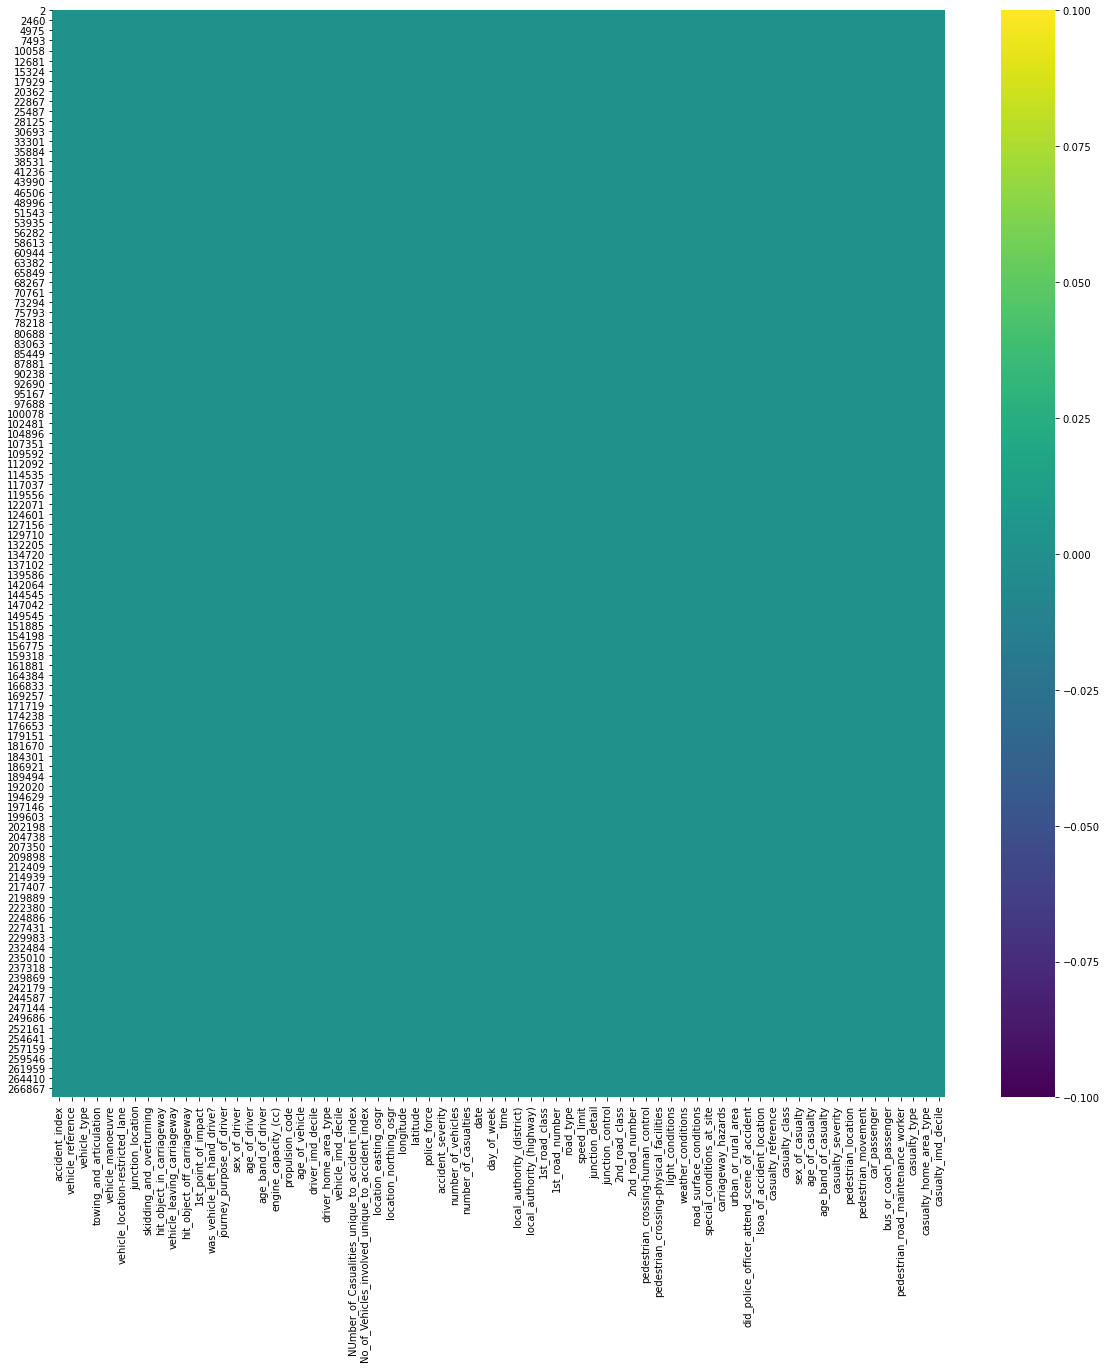

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),cmap='viridis',cbar=True)

In [13]:
#after clearing the nan values and the -1 i.e. nothing but the nan itself .. and this heatmap of null shows that.. 


In [14]:
#now we start the DEA part but for that we need to drop some un wanted cols here if you notice closely 
# two types of data is there as first of all the cause of accident and then the effect of it..

In [15]:
df.shape

(174538, 70)

In [16]:
df.columns

Index(['accident_index', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       '1st_point_of_impact', 'was_vehicle_left_hand_drive?',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_(cc)', 'propulsion_code',
       'age_of_vehicle', 'driver_imd_decile', 'driver_home_area_type',
       'vehicle_imd_decile', 'NUmber_of_Casualities_unique_to_accident_index',
       'No_of_Vehicles_involved_unique_to_accident_index',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_(district)', 'local_authority_(highway)

c:\users\aarnab saha\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex_of_driver', ylabel='count'>

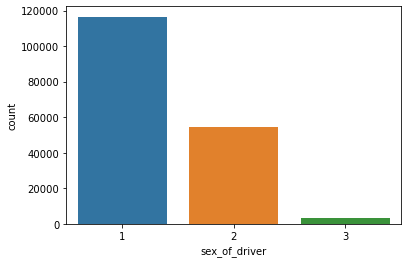

In [17]:
sns.countplot('sex_of_driver',data=df)

<AxesSubplot:>

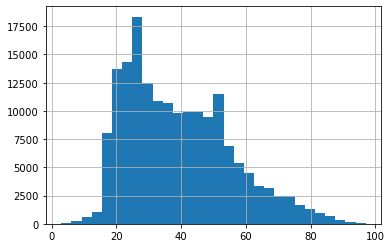

In [18]:
df['age_of_driver'].hist(bins=30)

c:\users\aarnab saha\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_of_driver'>

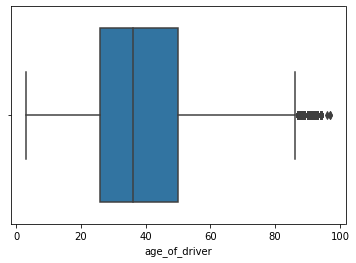

In [19]:
sns.boxplot('age_of_driver',data=df)

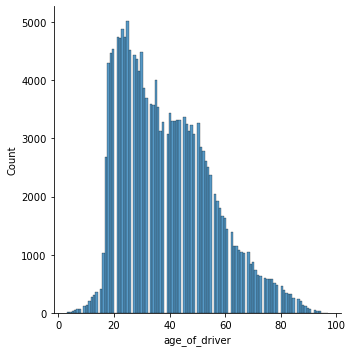

In [20]:
sns.displot(df['age_of_driver'],kind='hist')

In [21]:
df['age_of_driver'].describe()

count    174538.000000
mean         39.132630
std          16.327118
min           3.000000
25%          26.000000
50%          36.000000
75%          50.000000
max          97.000000
Name: age_of_driver, dtype: float64

In [22]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['age_of_driver'].mean() + 3* df['age_of_driver'].std()
lower_boundary=df['age_of_driver'].mean() - 3* df['age_of_driver'].std()
print(lower_boundary), print(uppper_boundary),print(df['age_of_driver'].mean())

-9.848724902021146
88.11398518917925
39.13263014357905


(None, None, None)

In [23]:
df.loc[df['age_of_driver']>=88,'age_of_driver']=88

c:\users\aarnab saha\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_of_driver'>

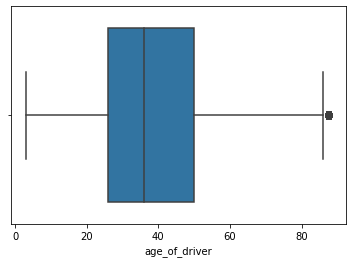

In [24]:
sns.boxplot('age_of_driver',data=df)

c:\users\aarnab saha\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='was_vehicle_left_hand_drive?', ylabel='count'>

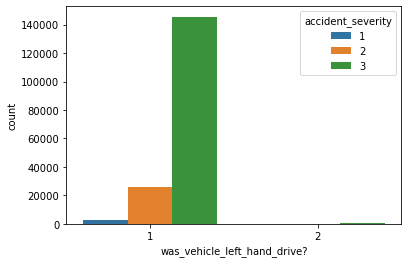

In [25]:
sns.countplot('was_vehicle_left_hand_drive?',hue='accident_severity',data=df)

c:\users\aarnab saha\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='accident_severity', ylabel='count'>

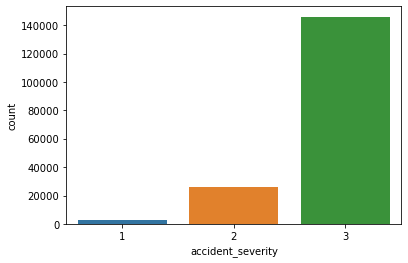

In [26]:
sns.countplot('accident_severity',data=df)
# type of accident happens 

c:\users\aarnab saha\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

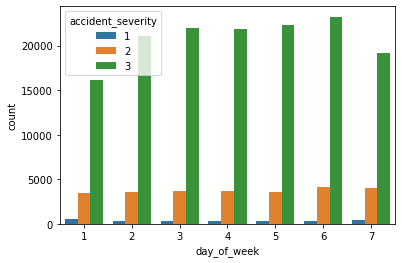

In [27]:
sns.countplot('day_of_week',hue='accident_severity',data=df)

c:\users\aarnab saha\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='road_type', ylabel='count'>

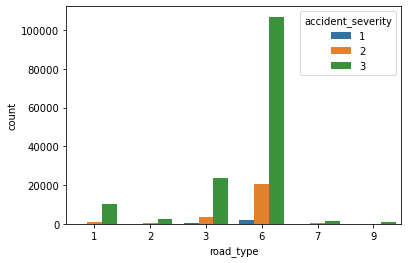

In [28]:
sns.countplot('road_type',hue='accident_severity',data=df)

c:\users\aarnab saha\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='urban_or_rural_area', ylabel='count'>

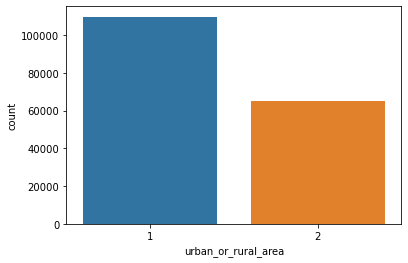

In [29]:
sns.countplot('urban_or_rural_area',data=df)

<AxesSubplot:>

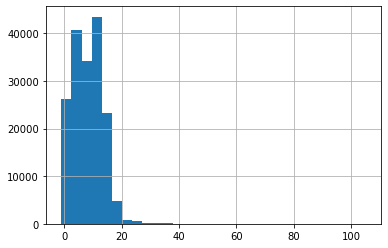

In [30]:
df['age_of_vehicle'].hist(bins=30)

In [31]:
df['age_of_vehicle'].describe()

count    174538.000000
mean          8.427133
std           5.157090
min          -1.000000
25%           4.000000
50%           8.000000
75%          12.000000
max         105.000000
Name: age_of_vehicle, dtype: float64

In [32]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.age_of_vehicle.quantile(0.75)-df.age_of_vehicle.quantile(0.25)

In [33]:
lower_bridge=df['age_of_vehicle'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['age_of_vehicle'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-8.0
24.0


(None, None)

In [34]:
#### Extreme outliers
lower_bridge=df['age_of_vehicle'].quantile(0.25)-(IQR*3)
upper_bridge=df['age_of_vehicle'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-20.0
36.0


(None, None)

In [35]:
df.loc[df['age_of_vehicle']>=36,'age_of_vehicle']=36

Text(0, 0.5, 'accident_severity')

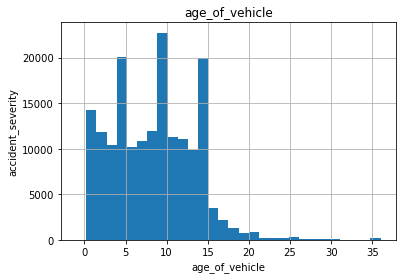

In [36]:
figure=df['age_of_vehicle'].hist(bins=30)
figure.set_title('age_of_vehicle')
figure.set_xlabel('age_of_vehicle')
figure.set_ylabel('accident_severity')

In [37]:
df.columns

Index(['accident_index', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       '1st_point_of_impact', 'was_vehicle_left_hand_drive?',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_(cc)', 'propulsion_code',
       'age_of_vehicle', 'driver_imd_decile', 'driver_home_area_type',
       'vehicle_imd_decile', 'NUmber_of_Casualities_unique_to_accident_index',
       'No_of_Vehicles_involved_unique_to_accident_index',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_(district)', 'local_authority_(highway)

In [38]:
df.shape

(174538, 70)

In [39]:
df.corr()

,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
vehicle_reference,1.000000,-0.033835,-0.006458,-0.061631,-0.033331,0.039129,-0.117894,-0.101703,-0.128539,-0.136904,...,0.056996,0.086803,-0.243341,-0.203091,0.050955,-0.032898,-0.135242,0.091295,0.010742,0.044246
vehicle_type,-0.033835,1.000000,0.090405,-0.067559,0.003065,-0.085475,0.032860,0.002587,0.042774,0.046048,...,0.047305,0.014286,0.085950,0.089109,0.035920,0.047115,0.024660,0.813348,0.034239,-0.011359
towing_and_articulation,-0.006458,0.090405,1.000000,0.009807,0.002839,-0.021746,0.058414,0.004043,0.012104,0.023669,...,0.022235,-0.010299,0.010084,0.010811,-0.003388,-0.002913,-0.005417,0.077419,0.027616,0.005526
vehicle_manoeuvre,-0.061631,-0.067559,0.009807,1.000000,-0.017337,0.040628,0.136519,0.087100,0.123144,0.134807,...,-0.065136,-0.119563,-0.027107,-0.038875,-0.047397,-0.044545,0.012433,-0.060387,0.042487,0.012811
vehicle_location-restricted_lane,-0.033331,0.003065,0.002839,-0.017337,1.000000,-0.003810,-0.015240,0.040794,0.007877,0.006984,...,-0.003938,-0.017802,0.099502,0.174526,-0.039334,0.006013,0.007072,-0.049141,-0.019281,-0.006039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bus_or_coach_passenger,-0.032898,0.047115,-0.002913,-0.044545,0.006013,-0.006963,-0.040379,-0.018358,-0.035726,-0.030086,...,0.049565,0.033848,-0.050517,-0.042481,-0.061815,1.000000,-0.027152,0.073945,-0.036199,-0.045344
pedestrian_road_maintenance_worker,-0.135242,0.024660,-0.005417,0.012433,0.007072,-0.008519,-0.054972,-0.022038,-0.051399,-0.053636,...,-0.022983,-0.009539,0.379452,0.298284,-0.082645,-0.027152,1.000000,-0.178279,-0.076510,-0.052247
casualty_type,0.091295,0.813348,0.077419,-0.060387,-0.049141,-0.043744,0.082156,0.025606,0.089348,0.094060,...,0.078892,0.064226,-0.331689,-0.278919,0.115299,0.073945,-0.178279,1.000000,0.062357,0.021138
casualty_home_area_type,0.010742,0.034239,0.027616,0.042487,-0.019281,-0.096084,0.082522,-0.009441,0.088840,0.095942,...,0.053390,-0.041806,-0.046500,-0.030288,0.001343,-0.036199,-0.076510,0.062357,1.000000,0.236864


In [40]:
df.drop(['accident_index','vehicle_reference','towing_and_articulation','No_of_Vehicles_involved_unique_to_accident_index','engine_capacity_(cc)','journey_purpose_of_driver'],axis=1,inplace=True)

In [41]:
df.head()

,vehicle_type,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
2,9,18,0,8,0,0,0,0,1,1,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,20,4,0,0,0,0,0,0,1,1,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
5,1,9,0,5,0,0,0,0,1,1,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
6,3,4,0,2,0,0,0,0,1,1,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0
8,9,14,0,1,0,0,0,0,4,1,...,3.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0


In [42]:
df.drop(['casualty_home_area_type','pedestrian_road_maintenance_worker','casualty_imd_decile','car_passenger','pedestrian_location','lsoa_of_accident_location','casualty_class','pedestrian_movement'],axis=1,inplace=True)

In [43]:
df.head()

,vehicle_type,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,...,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,casualty_reference,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,bus_or_coach_passenger,casualty_type
2,9,18,0,8,0,0,0,0,1,1,...,0,1,1,1.0,1.0,51.0,8.0,3.0,0.0,9.0
3,20,4,0,0,0,0,0,0,1,1,...,0,1,1,1.0,2.0,34.0,6.0,3.0,0.0,0.0
5,1,9,0,5,0,0,0,0,1,1,...,0,1,2,1.0,1.0,46.0,8.0,3.0,0.0,1.0
6,3,4,0,2,0,0,0,0,1,1,...,0,1,1,1.0,2.0,27.0,6.0,3.0,0.0,3.0
8,9,14,0,1,0,0,0,0,4,1,...,0,1,1,1.0,1.0,12.0,3.0,3.0,0.0,0.0


In [44]:
df.drop(['casualty_reference','bus_or_coach_passenger'],axis=1,inplace=True)

In [45]:
df.shape

(174538, 54)

In [46]:
df.drop(['did_police_officer_attend_scene_of_accident','carriageway_hazards','time','number_of_casualties','local_authority_(district)','local_authority_(highway)'],axis=1,inplace=True)

In [47]:
df.drop(['date'],axis=1,inplace=True)

In [48]:
df.drop(['driver_imd_decile','vehicle_imd_decile'],axis=1,inplace=True)

In [49]:
corr = df.corr()
corr

,vehicle_type,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,urban_or_rural_area,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,casualty_type
vehicle_type,1.000000,-0.067559,0.003065,-0.085475,0.032860,0.002587,0.042774,0.046048,0.000518,0.028383,...,0.008989,0.015690,0.029666,0.014352,0.078325,0.049409,0.054771,0.047305,0.014286,0.813348
vehicle_manoeuvre,-0.067559,1.000000,-0.017337,0.040628,0.136519,0.087100,0.123144,0.134807,-0.058967,-0.001401,...,0.079622,0.005092,0.045522,0.004406,0.076228,-0.110055,-0.065988,-0.065136,-0.119563,-0.060387
vehicle_location-restricted_lane,0.003065,-0.017337,1.000000,-0.003810,-0.015240,0.040794,0.007877,0.006984,-0.016771,-0.002693,...,-0.019713,0.002586,-0.021190,-0.011467,-0.051355,-0.011309,0.004077,-0.003938,-0.017802,-0.049141
junction_location,-0.085475,0.040628,-0.003810,1.000000,-0.100182,-0.040556,-0.084451,-0.103040,0.084243,-0.012724,...,-0.032059,-0.030054,-0.052169,-0.047804,-0.210967,-0.025507,0.015217,0.022603,0.048795,-0.043744
skidding_and_overturning,0.032860,0.136519,-0.015240,-0.100182,1.000000,0.140391,0.244590,0.276633,-0.005195,0.002388,...,0.098171,0.022467,0.096933,0.049587,0.187485,-0.046873,-0.035244,-0.028858,-0.068747,0.082156
hit_object_in_carriageway,0.002587,0.087100,0.040794,-0.040556,0.140391,1.000000,0.190808,0.189562,-0.005224,-0.004564,...,0.060185,0.012395,0.020105,0.008120,-0.000068,-0.025873,-0.016145,-0.012229,-0.036167,0.025606
vehicle_leaving_carriageway,0.042774,0.123144,0.007877,-0.084451,0.244590,0.190808,1.000000,0.538807,-0.005650,0.000180,...,0.110054,0.020047,0.097949,0.029796,0.202086,-0.024881,-0.018021,-0.014272,-0.079272,0.089348
hit_object_off_carriageway,0.046048,0.134807,0.006984,-0.103040,0.276633,0.189562,0.538807,1.000000,-0.009218,0.003856,...,0.119198,0.023605,0.106768,0.034572,0.203842,-0.017471,-0.020563,-0.017190,-0.069613,0.094060
1st_point_of_impact,0.000518,-0.058967,-0.016771,0.084243,-0.005195,-0.005224,-0.005650,-0.009218,1.000000,0.000312,...,-0.018183,-0.006907,-0.020361,-0.003609,-0.029858,0.003942,-0.019431,-0.015450,0.041007,-0.017198
was_vehicle_left_hand_drive?,0.028383,-0.001401,-0.002693,-0.012724,0.002388,-0.004564,0.000180,0.003856,0.000312,1.000000,...,0.003837,0.005853,0.003261,-0.002901,0.012511,0.001485,-0.001283,-0.001152,-0.003132,0.018003


In [50]:
df.shape

(174538, 45)

In [51]:
df.drop(['vehicle_type','vehicle_manoeuvre','vehicle_location-restricted_lane','skidding_and_overturning','hit_object_in_carriageway','vehicle_leaving_carriageway','hit_object_off_carriageway','driver_home_area_type','propulsion_code','sex_of_casualty','age_of_casualty','speed_limit'],axis=1,inplace=True)

In [52]:
df.head()

,junction_location,1st_point_of_impact,was_vehicle_left_hand_drive?,sex_of_driver,age_of_driver,age_band_of_driver,age_of_vehicle,NUmber_of_Casualities_unique_to_accident_index,location_easting_osgr,location_northing_osgr,...,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,urban_or_rural_area,age_band_of_casualty,casualty_severity,casualty_type
2,8,1,1,1,51,8,-1,1,383870.0,394420.0,...,0,5,1,1,1,0,1,8.0,3.0,9.0
3,0,1,1,1,50,8,1,1,386710.0,395700.0,...,0,4,1,1,1,0,1,6.0,3.0,0.0
5,5,1,1,1,46,8,1,1,384280.0,395200.0,...,0,0,1,1,1,0,1,8.0,3.0,1.0
6,2,1,1,2,27,6,8,1,383870.0,393730.0,...,0,5,7,1,1,0,1,6.0,3.0,3.0
8,1,4,1,1,24,5,1,1,385110.0,395540.0,...,0,5,1,1,1,0,1,3.0,3.0,0.0


<AxesSubplot:>

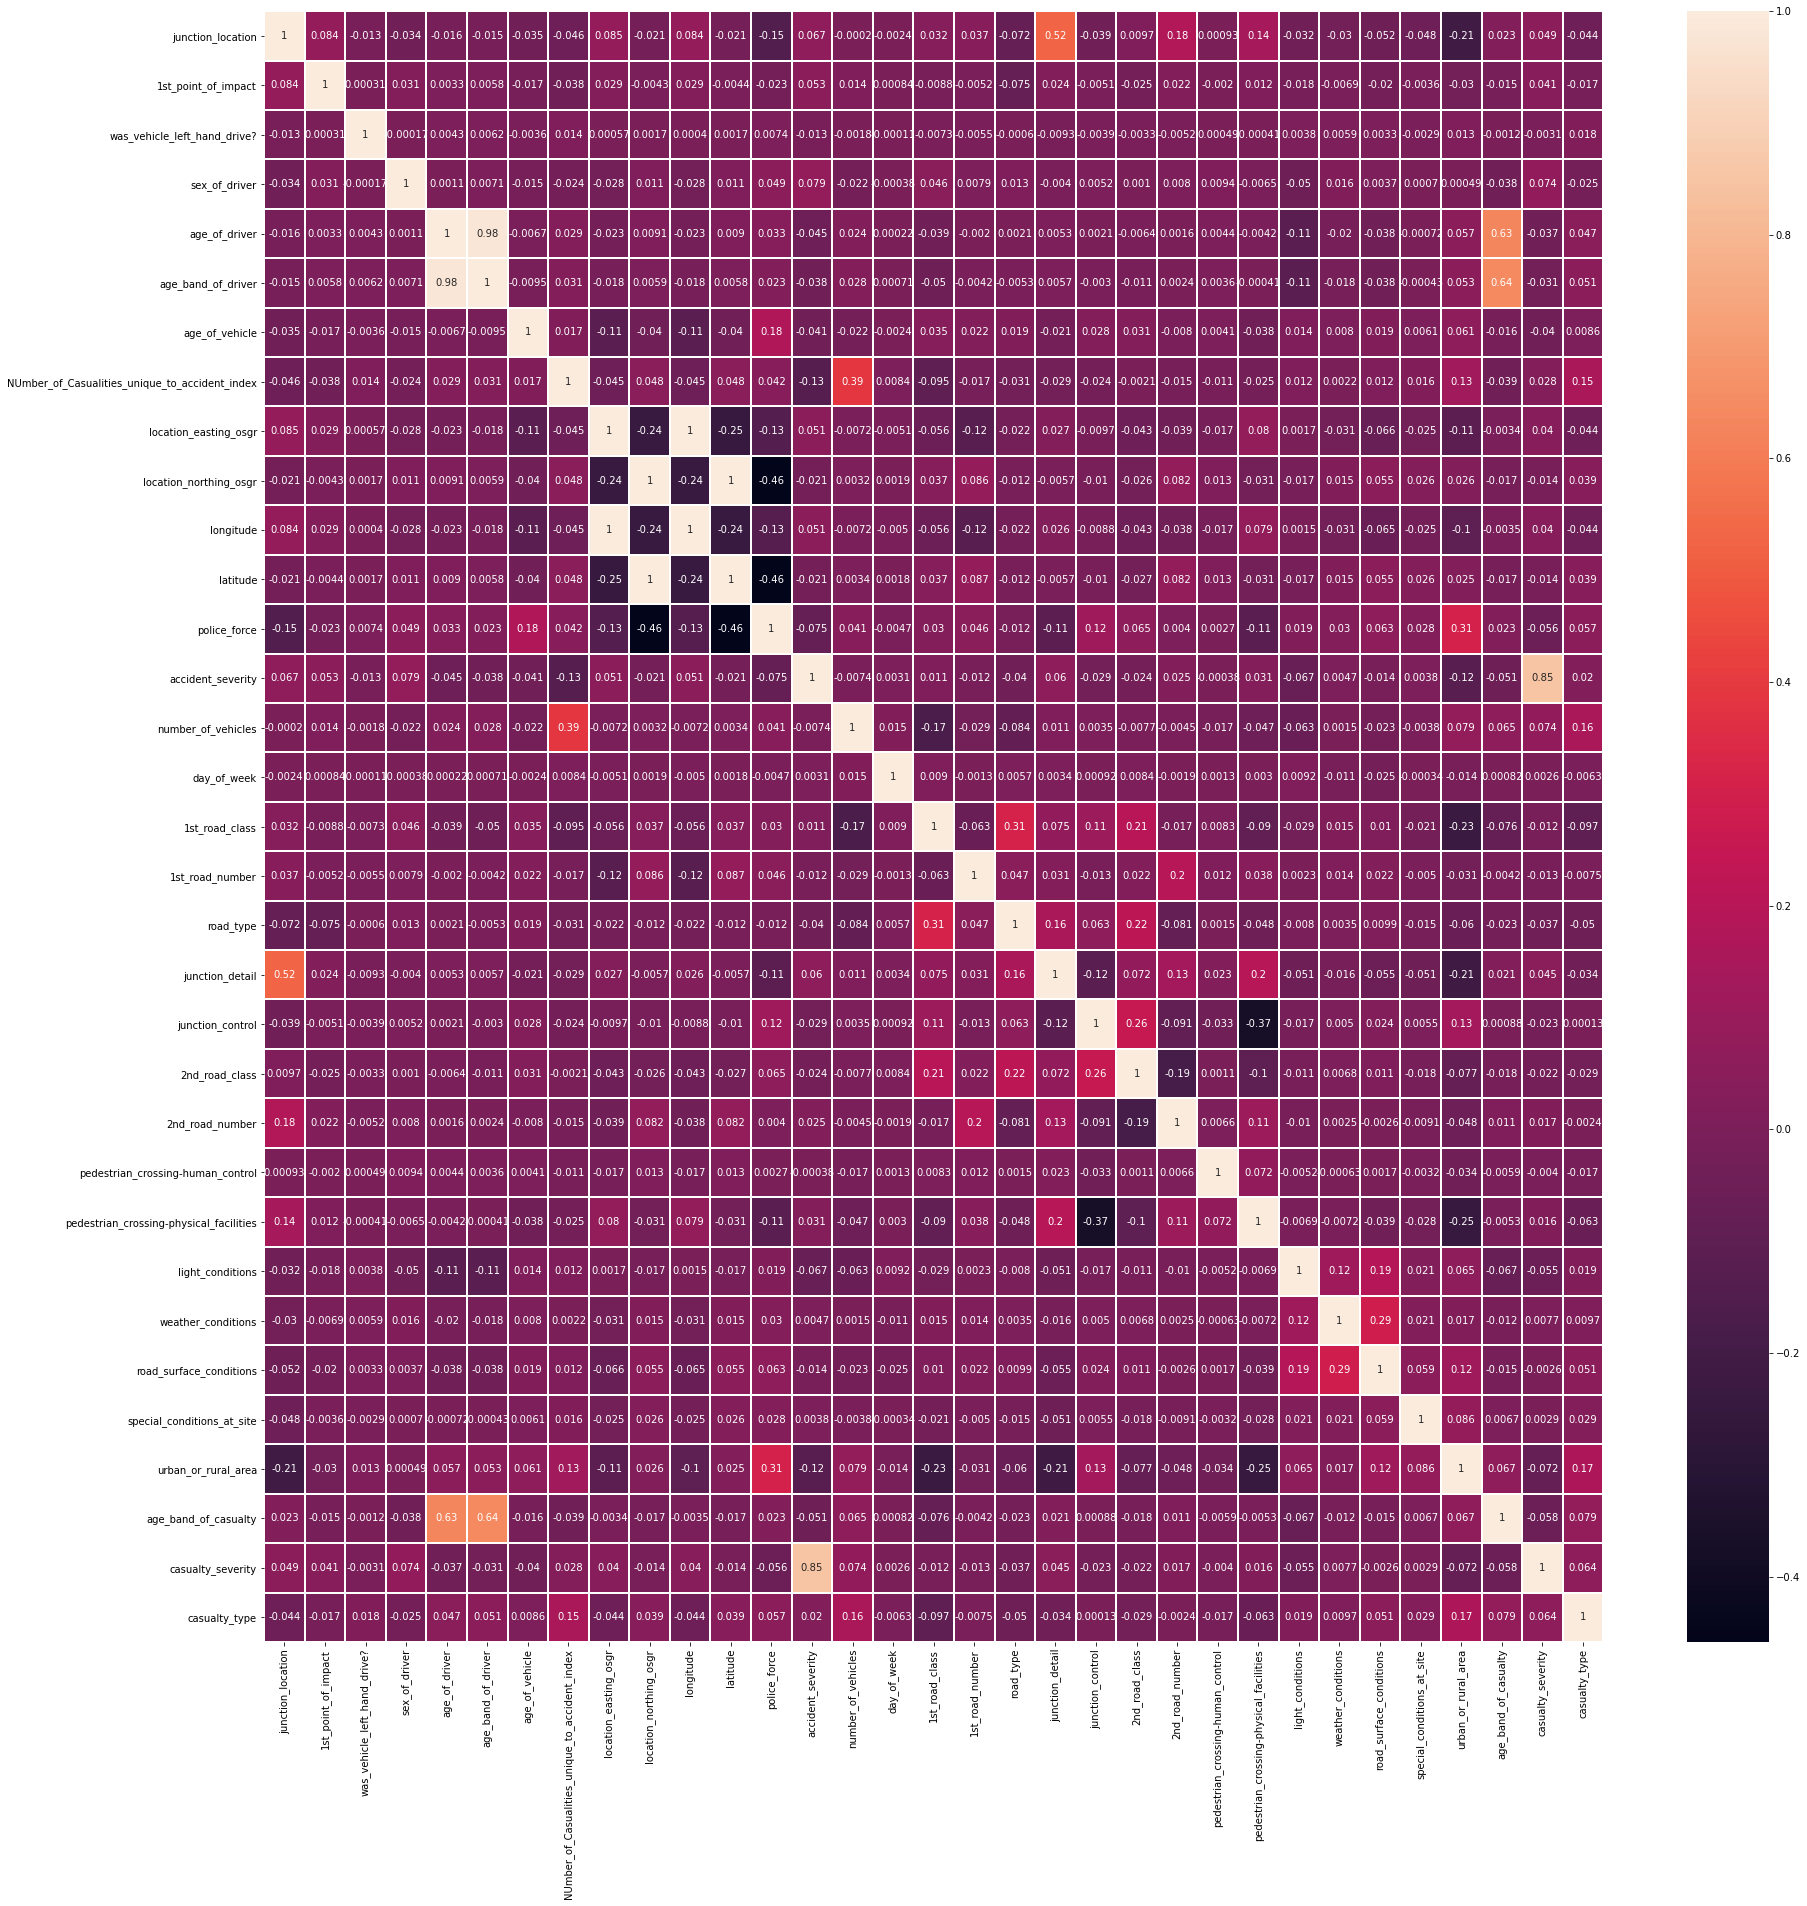

In [53]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,linewidths=1)

In [54]:
df.drop(['age_band_of_casualty','urban_or_rural_area','police_force','longitude','1st_road_number','1st_road_class'],axis=1,inplace=True)
df.drop(['pedestrian_crossing-human_control','2nd_road_class','2nd_road_number'],axis=1,inplace=True)

In [55]:
df.drop(['location_northing_osgr','location_easting_osgr'],axis=1,inplace=True)

In [56]:
df.drop(['age_of_vehicle'],axis=1,inplace=True)

In [57]:
df.drop(['was_vehicle_left_hand_drive?','age_band_of_driver','NUmber_of_Casualities_unique_to_accident_index','latitude','number_of_vehicles','junction_control'],axis=1,inplace=True)

In [58]:
df.head(10)

,junction_location,1st_point_of_impact,sex_of_driver,age_of_driver,accident_severity,day_of_week,road_type,junction_detail,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,casualty_severity,casualty_type
2,8,1,1,51,3,7,3,6,5,1,1,1,0,3.0,9.0
3,0,1,1,50,3,4,6,0,4,1,1,1,0,3.0,0.0
5,5,1,1,46,3,6,6,3,0,1,1,1,0,3.0,1.0
6,2,1,2,27,3,5,3,6,5,7,1,1,0,3.0,3.0
8,1,4,1,24,3,5,3,3,5,1,1,1,0,3.0,0.0
9,0,1,1,25,3,5,3,0,4,4,1,1,0,3.0,9.0
11,1,3,1,29,3,4,3,6,5,4,1,1,0,3.0,1.0
14,8,1,2,23,3,4,6,6,0,1,1,1,0,3.0,9.0
19,8,3,1,15,3,2,6,6,0,1,2,2,0,3.0,1.0
21,0,2,1,26,3,4,3,0,0,1,1,1,0,3.0,9.0


In [59]:
df.shape

(174538, 15)

In [60]:
#now the handeling catagorical features

In [61]:
col = ['sex_of_driver','day_of_week','junction_location','junction_detail','light_conditions']

def one_hot(df,columns):
    for each in columns:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df,dummies],axis=1)
    df=df.drop(columns,axis=1)
    return df
df=one_hot(df,col)


In [62]:
df.head()
print(df.shape)

(174538, 43)


In [63]:
#applying the ml algo for building the model

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [65]:
X=df.drop('accident_severity',axis=1)
X.shape

(174538, 42)

In [66]:
y=df.accident_severity
y.shape

(174538,)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
y_train.shape

(116940,)

In [70]:
X_train.shape

(116940, 42)

In [71]:
y_test.shape

(57598,)

In [72]:
X_test.shape

(57598, 42)

In [73]:
# logistic Regression
log_mod = LogisticRegression()
log_mod.fit(X_train,y_train)
y_pred = log_mod.predict(X_test)
score1 = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
print("acc_score",score1)
print(report)

[[  410   227   199]
 [    0  6690  2026]
 [    0     1 48045]]
acc_score 0.9574117156845724
              precision    recall  f1-score   support

           1       1.00      0.49      0.66       836
           2       0.97      0.77      0.86      8716
           3       0.96      1.00      0.98     48046

    accuracy                           0.96     57598
   macro avg       0.97      0.75      0.83     57598
weighted avg       0.96      0.96      0.95     57598



c:\users\aarnab saha\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
# random forest
forest = RandomForestClassifier(n_estimators=100,random_state=5,max_depth=5)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
score1 = accuracy_score(y_test,y_pred)
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
print("acc_score",score1)
report = classification_report(y_test,y_pred)
print(report)

[[    0   560   276]
 [    0  6685  2031]
 [    0     0 48046]]
acc_score 0.9502239661099344
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       836
           2       0.92      0.77      0.84      8716
           3       0.95      1.00      0.98     48046

    accuracy                           0.95     57598
   macro avg       0.63      0.59      0.60     57598
weighted avg       0.94      0.95      0.94     57598



c:\users\aarnab saha\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=7)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
score1 = accuracy_score(y_test,y_pred)
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
print("acc score",score1)
report = classification_report(y_test,y_pred)
print(report)

[[  489   148   199]
 [    6  6689  2021]
 [    0     9 48037]]
acc score 0.9586270356609604
              precision    recall  f1-score   support

           1       0.99      0.58      0.73       836
           2       0.98      0.77      0.86      8716
           3       0.96      1.00      0.98     48046

    accuracy                           0.96     57598
   macro avg       0.97      0.78      0.86     57598
weighted avg       0.96      0.96      0.96     57598



In [76]:
gau_mod = GaussianNB()

gau_mod.fit(X_train,y_train)
y_pred = gau_mod.predict(X_test)
score1 = accuracy_score(y_test,y_pred)
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
print("acc score",score1)
report = classification_report(y_test,y_pred)
print(report)


[[  500   150   186]
 [ 3056  3713  1947]
 [ 1048    24 46974]]
acc score 0.8886940518768013
              precision    recall  f1-score   support

           1       0.11      0.60      0.18       836
           2       0.96      0.43      0.59      8716
           3       0.96      0.98      0.97     48046

    accuracy                           0.89     57598
   macro avg       0.67      0.67      0.58     57598
weighted avg       0.94      0.89      0.90     57598



In [ ]:
gau_mod = KNeighborsClassifier(n_neighbors=3)


gau_mod.fit(X_train,y_train)
y_pred = gau_mod.predict(X_test)
score1 = accuracy_score(y_test,y_pred)
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
print("acc score",score1)
report = classification_report(y_test,y_pred)
print(report)